In [1]:
import time
from scipy import interpolate
import pandas as pd
import numpy as np
from plotnine import *
#from plotnine.data import *
import matplotlib.pyplot as plt
from datetime import datetime


df = pd.read_csv('Line_Data.csv')
# df['date'].map(lambda x:datetime.datetime.strptime(x, '%Y/%m/%d').date())
df['date'] = [datetime.strptime(d, '%Y/%m/%d').date() for d in df['date']]

melt_df = pd.melt(df, id_vars=["date"],
                  var_name='variable', value_name='value')

display(df, melt_df)


,date,AMZN,AAPL
0,2000-01-01,69.00,25.94
1,2000-02-01,67.00,28.66
2,2000-03-01,55.00,33.95
3,2000-04-01,48.00,31.01
4,2000-05-01,36.00,21.00
...,...,...,...
117,2009-10-01,136.00,188.50
118,2009-11-01,134.52,199.91
119,2009-12-01,125.00,210.73
120,2010-01-01,118.00,192.06


,date,variable,value
0,2000-01-01,AMZN,69.00
1,2000-02-01,AMZN,67.00
2,2000-03-01,AMZN,55.00
3,2000-04-01,AMZN,48.00
4,2000-05-01,AMZN,36.00
...,...,...,...
239,2009-10-01,AAPL,188.50
240,2009-11-01,AAPL,199.91
241,2009-12-01,AAPL,210.73
242,2010-01-01,AAPL,192.06


## 图611 多数据系列图. (a)折线图

C:\QMDownload\anaconda\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


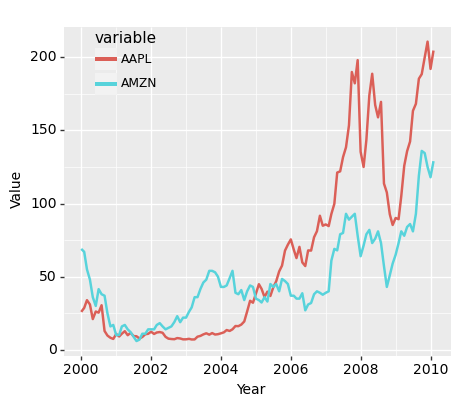

<ggplot: (151579620157)>


In [2]:
base_plot = (ggplot(melt_df, aes(x='date', y='value',
                                 group='variable', color='variable')) +
             # geom_area(fill="#FF6B5E",alpha=0.75)+
             geom_line(size=1) +
             scale_x_date(date_labels="%Y", date_breaks="2 year") +
             scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl') +
             xlab("Year") +
             ylab("Value") +
             theme(axis_title=element_text(size=10, face="plain", color="black"),
                   axis_text=element_text(
                       size=10, face="plain", color="black"),
                   legend_position=(0.25, 0.8),
                   legend_background=element_blank(),
                   aspect_ratio=0.85,
                   figure_size=(5, 5),
                   dpi=100
                   ))

print(base_plot)


## 图611 多数据系列图.(b)面积图

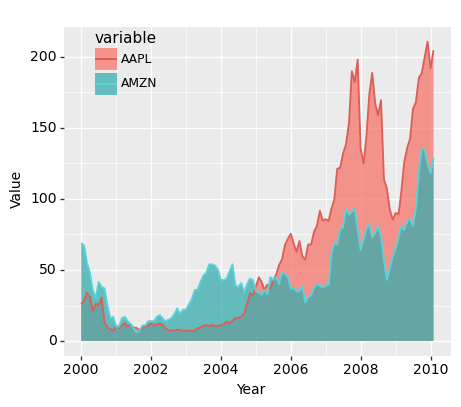

<ggplot: (151579620217)>


In [3]:
base_plot = (ggplot(melt_df, aes(x='date', y='value', group='variable')) +
             geom_area(aes(fill='variable'), alpha=0.75, position="identity") +
             geom_line(aes(color='variable'), size=0.75) +  # color="black",
             scale_x_date(date_labels="%Y", date_breaks="2 year") +
             scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl') +
             xlab("Year") +
             ylab("Value") +
             theme(axis_title=element_text(size=10, face="plain", color="black"),
                   axis_text=element_text(
                       size=10, face="plain", color="black"),
                   legend_position=(0.25, 0.8),
                   legend_background=element_blank(),
                   aspect_ratio=0.85,
                   figure_size=(5, 5),
                   dpi=100
                   ))

print(base_plot)


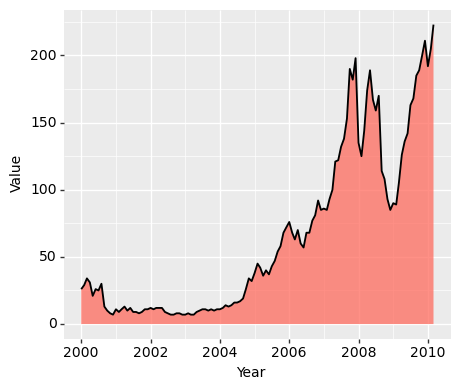

<ggplot: (151573235514)>


In [4]:
# ---------------------------------图6-1-2 填充面积折线图. (a)纯色填------------------------------------------
df = pd.read_csv('Area_Data.csv')

# df['date'].map(lambda x:datetime.datetime.strptime(x, '%Y/%m/%d').date())
df['date'] = [datetime.strptime(d, '%Y/%m/%d').date() for d in df['date']]


base_plot = (ggplot(df, aes(x='date', y='value', group=1)) +
             geom_area(fill="#FF6B5E", alpha=0.75, color='none') +
             geom_line(color="black", size=0.75) +
             scale_x_date(date_labels="%Y", date_breaks="2 year") +
             xlab("Year") +
             ylab("Value") +
             theme(axis_title=element_text(size=10, face="plain", color="black"),
                   axis_text=element_text(
                       size=10, face="plain", color="black"),
                   #legend_background = element_blank(),
                   aspect_ratio=0.85,
                   figure_size=(5, 5),
                   dpi=100)
             )

print(base_plot)


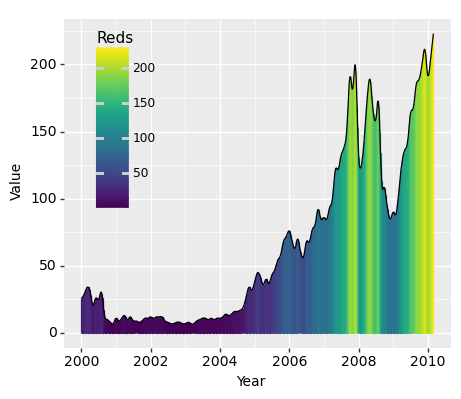

<ggplot: (151581293240)>


In [5]:
# ------------------------------------------图6-1-2 填充面积折线图.(b)颜色映射填充.--------------------------------------
# 从scipy库中导入插值需要的方法 interpolate

df = pd.read_csv('Area_Data.csv')

df['x'] = [time.mktime(time.strptime(d, '%Y/%m/%d')) for d in df['date']]

f = interpolate.interp1d(df['x'], df['value'], kind='quadratic')
# 插值方式:nearest：最邻近插值法；zero：阶梯插值；slinear、linear：线性插值；quadratic、cubic：2、3阶B样条曲线插值

x_new = np.linspace(np.min(df['x']), np.max(df['x']), 600)
df_interpolate = pd.DataFrame(dict(x=x_new, value=f(x_new)))

# df['date'].map(lambda x:datetime.datetime.strptime(x, '%Y/%m/%d').date())
df_interpolate['date'] = [datetime.strptime(time.strftime(
    '%Y-%m-%d', time.gmtime(d)), '%Y-%m-%d') for d in df_interpolate['x']]

base_plot = (ggplot(df_interpolate, aes(x='date', y='value', group=1)) +  # geom_area(fill="#FF6B5E",alpha=0.75)
             geom_bar(aes(fill='value', colour='value'), stat="identity", alpha=1, width=2) +
             geom_line(color="black", size=0.5) +
             scale_color_cmap(name='Reds') +
             # scale_color_gradientn(colours=brewer.pal(9,'Reds'),name = "Value")+
             scale_x_date(date_labels="%Y", date_breaks="2 year") +
             xlab("Year") +
             ylab("Value") +
             guides(fill=False) +
             theme(
    axis_title=element_text(size=10, face="plain", color="black"),
    axis_text=element_text(size=10, face="plain", color="black"),
    legend_background=element_blank(),
    legend_position=(0.25, 0.65),
    aspect_ratio=0.85,
    figure_size=(5, 5),
    dpi=100
))

print(base_plot)


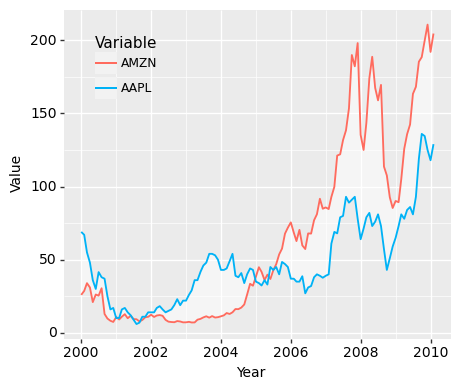

<ggplot: (151581370814)>


In [6]:
# h=time.strftime('%Y-%m-%d', time.gmtime(a))#再由中间格式转为字符串(str)
# ct =datetime.strptime(h, '%Y-%m-%d')#最后由字符串格式转为datetime.datetime格式

# -------------------------------------图6-1-3 夹层填充面积图. (a)单色-----------------------------------------------------
df = pd.read_csv('Line_Data.csv')

# df['date'].map(lambda x:datetime.datetime.strptime(x, '%Y/%m/%d').date())
df['date'] = [datetime.strptime(d, '%Y/%m/%d').date() for d in df['date']]

df['ymin'] = df[['AMZN', 'AAPL']].apply(lambda x: x.min(), axis=1)
df['ymax'] = df[['AMZN', 'AAPL']].apply(lambda x: x.max(), axis=1)

melt_df = pd.melt(df[['date', 'AMZN', 'AAPL']], id_vars=[
                  "date"], var_name='variable', value_name='value')


base_plot = (ggplot() +
             geom_ribbon(aes(x='date', ymin='ymin', ymax='ymax', group=1), df, alpha=0.5, fill="white", color="none") +
             # geom_area(aes(fill=variable),alpha=0.5,position="identity")+
             # color="black",
             geom_line(aes(x='date', y='value', color='variable', group='variable'), melt_df, size=0.75) +

             scale_x_date(date_labels="%Y", date_breaks="2 year") +
             xlab("Year") +
             ylab("Value") +
             scale_colour_manual(name="Variable",
                                 labels=("AMZN", "AAPL"),
                                 values=("#FF6B5E", "#00B2F6")) +
             theme(
    axis_title=element_text(size=10, face="plain", color="black"),
    axis_text=element_text(size=10, face="plain", color="black"),
    legend_background=element_blank(),
    legend_position=(0.25, 0.75),
    aspect_ratio=0.85,
    figure_size=(5, 5),
    dpi=100
))

print(base_plot)


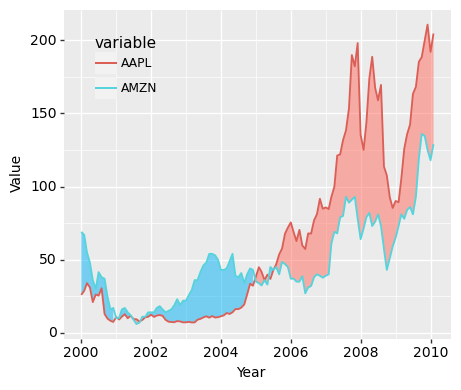

<ggplot: (151581384668)>


In [7]:
# ----------------------------------------图6-1-3 夹层填充面积图.  (b)多色----------------

df['ymin1'] = df['ymin']
df.loc[(df['AAPL']-df['AMZN']) > 0, 'ymin1'] = np.nan

df['ymin2'] = df['ymin']
df.loc[(df['AAPL']-df['AMZN']) <= 0, 'ymin2'] = np.nan


df['ymax1'] = df['ymax']
df.loc[(df['AAPL']-df['AMZN']) > 0, 'ymax1'] = np.nan

df['ymax2'] = df['ymax']
df.loc[(df['AAPL']-df['AMZN']) <= 0, 'ymax2'] = np.nan


base_plot = (ggplot() +
             # ,fill = AMZN > AAPL
             geom_ribbon(aes(x='date', ymin='ymin1', ymax='ymax1', group=1), df, alpha=0.5, fill="#00B2F6", color="none") +
             # ,fill = AMZN > AAPL
             geom_ribbon(aes(x='date', ymin='ymin2', ymax='ymax2', group=1), df, alpha=0.5, fill="#FF6B5E", color="none") +
             # geom_area(aes(fill=variable),alpha=0.5,position="identity")+
             # color="black",
             geom_line(aes(x='date', y='value', color='variable', group='variable'), melt_df, size=0.75) +

             scale_x_date(date_labels="%Y", date_breaks="2 year") +
             xlab("Year") +
             ylab("Value") +
             theme(
    axis_title=element_text(size=10, face="plain", color="black"),
    axis_text=element_text(size=10, face="plain", color="black"),
    legend_background=element_blank(),
    legend_position=(0.25, 0.75),
    aspect_ratio=0.85,
    figure_size=(5, 5),
    dpi=100
))

print(base_plot)
